# Exploratory Data Analysis

Summer Siege 2025
ML Club

**Project Statement 01: Sequence-Based Prediction of Protein Secondary Structure**

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
df = pd.read_csv("CB513.csv")

df.head()

,input,dssp3,dssp8,disorder,cb513_mask
0,RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMD...,CCCCCCCHHHCCCCCECHHHHCCCCCCCCEHHHHHHHHHHCHHHHH...,CCCTTCCGGGSCCCCBCHHHHTTTTCSCCBHHHHHHHHHHTHHHHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
1,GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYE...,CEEEEEEECCCEEEEEEECCCECCCCCCCCCCCEEEEEECEEEEEC...,CEEEEEEETTTEEEEEEECSCBSCCTTTCSCCSEEEEEESEEEEES...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
2,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
3,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...,CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTT...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
4,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...,CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input       511 non-null    object
 1   dssp3       511 non-null    object
 2   dssp8       511 non-null    object
 3   disorder    511 non-null    object
 4   cb513_mask  511 non-null    object
dtypes: object(5)
memory usage: 20.1+ KB
None


### Analysis

#### Sequence Lengths

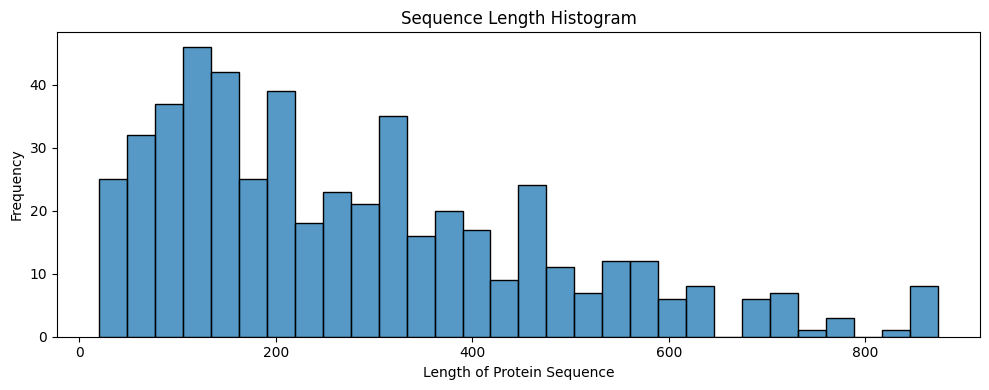

In [5]:
# Input

df["seq_len"] = df["input"].apply(len)
plt.figure(figsize=(10, 4))
sns.histplot(df["seq_len"], bins=30)
plt.title("Sequence Length Histogram")
plt.xlabel("Length of Protein Sequence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Note that lengths of input sequence and output sequences are same ($T_x = T_y$)

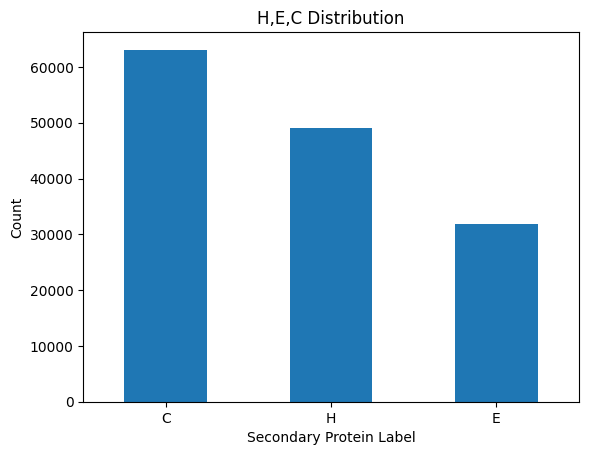

Percentages for each label:
C    43.804987
H    34.029345
E    22.165668
Name: proportion, dtype: float64


In [6]:
# Output (DSSP3)
all_dssp3 = ''.join(df["dssp3"].tolist())


dssp3_counts = pd.Series(list(all_dssp3)).value_counts()
dssp3_counts.plot(kind="bar", title="H,E,C Distribution", ylabel="Count", xlabel="Secondary Protein Label")
plt.xticks(rotation=0)

plt.show()

percentages = pd.Series(list(all_dssp3)).value_counts(normalize=True) * 100
print("Percentages for each label:")
print(percentages)

"Coils (C) dominate, causing class imbalance and overprediction bias."

#### Amino Acid Composition Analysis

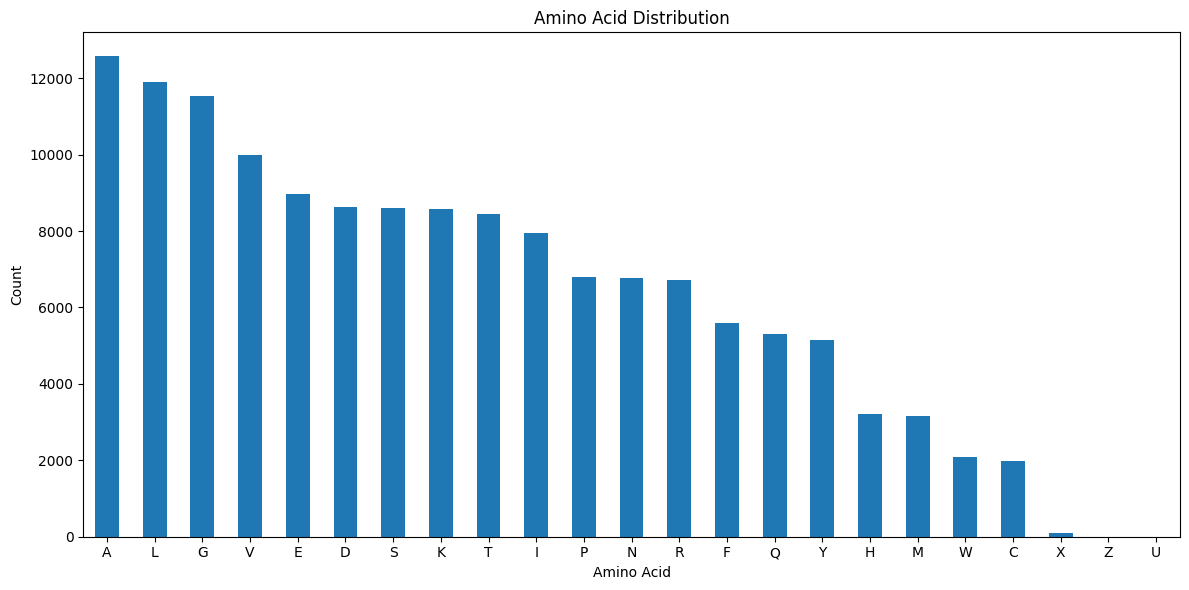

In [7]:
all_sequences = ''.join(df["input"].tolist())
aa_counts = pd.Series(list(all_sequences)).value_counts()

plt.figure(figsize=(12, 6))
aa_counts.plot(kind="bar", title="Amino Acid Distribution", ylabel="Count", xlabel="Amino Acid")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
aa_percentages = aa_counts / len(all_sequences) * 100
print("Top 10 most frequent amino acids:")
print(aa_percentages.head(10))

Top 10 most frequent amino acids:
A    8.729194
L    8.257703
G    8.000778
V    6.937664
E    6.229385
D    5.991903
S    5.968294
K    5.964128
T    5.871079
I    5.519717
Name: count, dtype: float64


In [9]:
def analyze_aa_by_structure():
    """Analyze amino acid preferences for each secondary structure"""
    structure_aa = {'H': [], 'E': [], 'C': []}
    
    for seq, ss in zip(df["input"], df["dssp3"]):
        seq, ss = seq.strip().upper(), ss.strip().upper()
        for aa, struct in zip(seq, ss):
            if struct in structure_aa:
                structure_aa[struct].append(aa)
    
    # Calculate amino acid frequencies for each structure
    aa_preferences = {}
    for struct in ['H', 'E', 'C']:
        aa_counts_struct = pd.Series(structure_aa[struct]).value_counts()
        aa_preferences[struct] = aa_counts_struct / len(structure_aa[struct]) * 100
    
    return aa_preferences

aa_preferences = analyze_aa_by_structure()

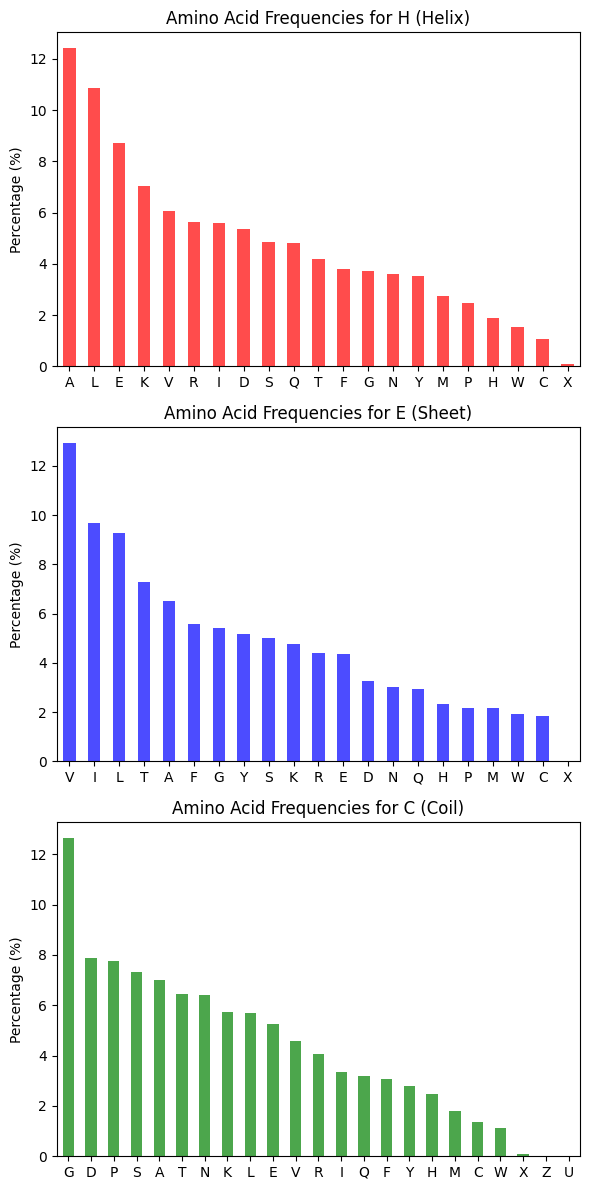

In [10]:

fig, axes = plt.subplots(3, 1, figsize=(6, 12))
structures = ['H', 'E', 'C']
colors = ['red', 'blue', 'green']

for i, (struct, color) in enumerate(zip(structures, colors)):
    if struct in aa_preferences:
        aa_preferences[struct].plot(kind="bar", ax=axes[i], color=color, alpha=0.7)
        axes[i].set_title(f'Amino Acid Frequencies for {struct} (Helix)' if struct == 'H' else 
                         f'Amino Acid Frequencies for {struct} (Sheet)' if struct == 'E' else 
                         f'Amino Acid Frequencies for {struct} (Coil)')
        axes[i].set_ylabel('Percentage (%)')
        axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
